# Data Understanding

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = '/Users/This Pc/Downloads/res_recc/'

info_res = pd.read_csv(DATA_PATH+'res_with_id.csv')
res_rating = pd.read_csv(DATA_PATH+'res_rating.csv')
userres = pd.read_csv(DATA_PATH+'userres.csv')


In [66]:
info_res.sample(5)

,Res_Id,Res_Name,Res_Address,Res_Descriptions,Res_City,Res_Type,Res_Price,Res_Rating
8,1152,Phở Cuốn Hương Mai,"25 P. Ngũ Xã, Trúc Bạch, Ba Đình",Sinh ra từ làng Ngũ Xã – cái nôi của món phở c...,Hà Nội,Quán ăn,150000,"9,2"
17,3332,Quán Bún Ốc Gia Truyền Bà Thoa,"Ng. 7 P. Liễu Giai/2C2 P. Kim Mã Thượng, Cống ...","Bún ốc Gia Truyền Bà Thoa ngon, rẻ, thịt ốc tư...",Hà Nội,Quán ăn,55000,9
14,1544,Quán Bò Nhúng Dấm 999,"48 P. Trần Xuân Soạn, Ngô Thì Nhậm, Hai Bà Trưng",Một trong những địa chỉ lẩu bò nhúng dấm được ...,Hà Nội,Quán ăn,120000,"8,8"
12,3305,Phở Thìn Bờ Hồ,"61 P. Đinh Tiên Hoàng, Lý Thái Tổ, Hoàn Kiếm",Phở Thìn là thương hiệu phở bò gia truyền lâu ...,Hà Nội,Quán ăn,80000,"9,2"
13,4722,Quán Bánh Đúc Nóng cô Nội,"Ngõ 8 P. Lê Ngọc Hân, Ngô Thì Nhậm, Hai Bà Trưng",Quán nằm trong con ngõ sâu. Khách có thể ngồi ...,Hà Nội,Ăn vặt/vỉa hè,35000,"9,3"


In [67]:
res_rating.sample(5)

,Res_User_Id,Res_Id,Res_User_Rating,Res_User_Review_Date,Res_User_Review
20,860,3332,3,NaN,NaN
22,943,4929,2,NaN,NaN
26,783,2795,1,1 month ago,"Bún chả tệ nhất từng ăn, thua cả những hàng nh..."
75,198,1463,5,2 weeks ago,NaN
4,812,1474,4,NaN,NaN


In [68]:
userres.sample(5)

,Res_User_Id,Res_User_Location
34,250,Đà Nẵng
27,929,Quảng Ninh
32,447,Nam Định
25,970,Quảng Nam
4,898,Phú Thọ


In [69]:
print(f"Number of restaurant in the datasets : {len(info_res.Res_Id.unique())}")
print(f"Number of users : {len(userres.Res_User_Id.unique())}")
print(f"The number of ratings given by the user to the dataset : {len(res_rating.Res_User_Id)}")

Number of restaurant in the datasets : 18
Number of users : 59
The number of ratings given by the user to the dataset : 112


# Exploratory Data Analysis

In [70]:
info_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Res_Id            18 non-null     int64 
 1   Res_Name          18 non-null     object
 2   Res_Address       18 non-null     object
 3   Res_Descriptions  18 non-null     object
 4   Res_City          18 non-null     object
 5   Res_Type          18 non-null     object
 6   Res_Price         18 non-null     int64 
 7   Res_Rating        18 non-null     object
dtypes: int64(2), object(6)
memory usage: 1.3+ KB


In [71]:
info_res.isnull().sum()

Res_Id              0
Res_Name            0
Res_Address         0
Res_Descriptions    0
Res_City            0
Res_Type            0
Res_Price           0
Res_Rating          0
dtype: int64

In [72]:
res_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Res_User_Id           112 non-null    int64 
 1   Res_Id                112 non-null    int64 
 2   Res_User_Rating       112 non-null    int64 
 3   Res_User_Review_Date  59 non-null     object
 4   Res_User_Review       48 non-null     object
dtypes: int64(3), object(2)
memory usage: 4.5+ KB


In [73]:
res_rating.isnull().sum()

Res_User_Id              0
Res_Id                   0
Res_User_Rating          0
Res_User_Review_Date    53
Res_User_Review         64
dtype: int64

In [74]:
userres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Res_User_Id        61 non-null     int64 
 1   Res_User_Location  61 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [75]:
userres.isnull().sum()

Res_User_Id          0
Res_User_Location    0
dtype: int64

In [76]:
info_res.Res_Descriptions.unique()

array(['Thủy Lương Ngan Cháy Tỏi - Hàng Lược có thực đơn đa dạng từ bún ngan, chảo ngan, ngan luộc, ngan xào cho đến ngan nướng rất thích hợp cho khách ăn trưa ăn tối và dân nhậu. Đặc biệt món ăn bán chạy nhất quán là bún ngan trộn chua ngọt, với hương vị chua, cay, mặn, ngọt đủ cả, gắp một miếng thôi cũng đã khiến thực khách mê đắm, không thể buông đũa xuống được. Từng miếng ngan ở đây rất sạch sẽ, đảm bảo vệ sinh an toàn thực phẩm, được chặt đẹp mắt, ướp gia vị thơm mọng, đĩa ngan đầy đặn, chinh phục mọi khách hàng khó tính nhất.',
       'Chả cá Thăng Long là một trong những nhà hàng có tên tuổi lớn của món Chả Cá Lã Vọng ở đất Hà Thành. Tuy không có quá nhiều món ăn đa dạng như những nhà hàng Chả cá Lã Vọng mới khác, Menu Chả cá Thăng Long thu hút thực khách bởi hương vị thơm ngon của ẩm thực truyền thống. Chính điều này làm nên những nét riêng của Chả cá Thăng Long so với các cửa hàng Chả Cá Lã Vọng khác.',
       'Mắm tôm của quán bún đậu cô Tuyến Hàng Khay rất đậm đà, có công th

# Data Preprocessing

In [77]:
import numpy as np

res_all = np.concatenate((
    info_res.Res_Id.unique(),
    res_rating.Res_Id.unique()
))

res_all = np.sort(np.unique(res_all))

print(f"Total number of restaurant: {len(res_all)}")

Total number of restaurant: 18


In [78]:
all_res_rate = res_rating
all_res_rate

,Res_User_Id,Res_Id,Res_User_Rating,Res_User_Review_Date,Res_User_Review
0,796,4929,5,2 months ago,"Món ngan cháy tỏi được ướp thấm các gia vị, tỏ..."
1,796,2795,4,NaN,NaN
2,796,1846,5,NaN,NaN
3,812,4929,5,7 months ago,Hai vc tình cờ đi qua nên vào ăn thử. Không ng...
4,812,1474,4,NaN,NaN
...,...,...,...,...,...
107,989,3367,4,4 weeks ago,NaN
108,122,3367,5,a month ago,đồ ăn quá đỉnh ạ
109,270,3332,4,2 weeks ago,"Bún ngon , riêng quẩy rất ỉu nhưng vẫn mang bá..."
110,905,3332,4,2 weeks ago,Quán bún ốc khá ngon nhưng hơi ít toping. Bát ...


In [79]:
all_res = pd.merge(all_res_rate,info_res[["Res_Id","Res_Name","Res_Descriptions","Res_City","Res_Type"]],on='Res_Id', how='left')
all_res

,Res_User_Id,Res_Id,Res_User_Rating,Res_User_Review_Date,Res_User_Review,Res_Name,Res_Descriptions,Res_City,Res_Type
0,796,4929,5,2 months ago,"Món ngan cháy tỏi được ướp thấm các gia vị, tỏ...",Thủy Lương Ngan Cháy Tỏi,Thủy Lương Ngan Cháy Tỏi - Hàng Lược có thực đ...,Hà Nội,Quán ăn
1,796,2795,4,NaN,NaN,Bún Chả 41 Cửa Đông,Tuy nằm ẩn nấp trong hẻm nhưng quán Bún Chả Ne...,Hà Nội,Quán ăn
2,796,1846,5,NaN,NaN,Bún Riêu Cua 41 Quang Trung,Được biết đến như một trong những địa điểm bún...,Hà Nội,Quán ăn
3,812,4929,5,7 months ago,Hai vc tình cờ đi qua nên vào ăn thử. Không ng...,Thủy Lương Ngan Cháy Tỏi,Thủy Lương Ngan Cháy Tỏi - Hàng Lược có thực đ...,Hà Nội,Quán ăn
4,812,1474,4,NaN,NaN,Chả Cá Thăng Long,Chả cá Thăng Long là một trong những nhà hàng ...,Hà Nội,Nhà hàng
...,...,...,...,...,...,...,...,...,...
107,989,3367,4,4 weeks ago,NaN,Bánh Mỳ Dân Tổ,Bánh mì dân tổ ban đầu thường được phục vụ cho...,Hà Nội,Ăn vặt/vỉa hè
108,122,3367,5,a month ago,đồ ăn quá đỉnh ạ,Bánh Mỳ Dân Tổ,Bánh mì dân tổ ban đầu thường được phục vụ cho...,Hà Nội,Ăn vặt/vỉa hè
109,270,3332,4,2 weeks ago,"Bún ngon , riêng quẩy rất ỉu nhưng vẫn mang bá...",Quán Bún Ốc Gia Truyền Bà Thoa,"Bún ốc Gia Truyền Bà Thoa ngon, rẻ, thịt ốc tư...",Hà Nội,Quán ăn
110,905,3332,4,2 weeks ago,Quán bún ốc khá ngon nhưng hơi ít toping. Bát ...,Quán Bún Ốc Gia Truyền Bà Thoa,"Bún ốc Gia Truyền Bà Thoa ngon, rẻ, thịt ốc tư...",Hà Nội,Quán ăn


In [80]:
all_res['Res_city_type'] = all_res[['Res_City', 'Res_Type']].astype(str).agg(' '.join, axis=1)

In [81]:
all_res

,Res_User_Id,Res_Id,Res_User_Rating,Res_User_Review_Date,Res_User_Review,Res_Name,Res_Descriptions,Res_City,Res_Type,Res_city_type
0,796,4929,5,2 months ago,"Món ngan cháy tỏi được ướp thấm các gia vị, tỏ...",Thủy Lương Ngan Cháy Tỏi,Thủy Lương Ngan Cháy Tỏi - Hàng Lược có thực đ...,Hà Nội,Quán ăn,Hà Nội Quán ăn
1,796,2795,4,NaN,NaN,Bún Chả 41 Cửa Đông,Tuy nằm ẩn nấp trong hẻm nhưng quán Bún Chả Ne...,Hà Nội,Quán ăn,Hà Nội Quán ăn
2,796,1846,5,NaN,NaN,Bún Riêu Cua 41 Quang Trung,Được biết đến như một trong những địa điểm bún...,Hà Nội,Quán ăn,Hà Nội Quán ăn
3,812,4929,5,7 months ago,Hai vc tình cờ đi qua nên vào ăn thử. Không ng...,Thủy Lương Ngan Cháy Tỏi,Thủy Lương Ngan Cháy Tỏi - Hàng Lược có thực đ...,Hà Nội,Quán ăn,Hà Nội Quán ăn
4,812,1474,4,NaN,NaN,Chả Cá Thăng Long,Chả cá Thăng Long là một trong những nhà hàng ...,Hà Nội,Nhà hàng,Hà Nội Nhà hàng
...,...,...,...,...,...,...,...,...,...,...
107,989,3367,4,4 weeks ago,NaN,Bánh Mỳ Dân Tổ,Bánh mì dân tổ ban đầu thường được phục vụ cho...,Hà Nội,Ăn vặt/vỉa hè,Hà Nội Ăn vặt/vỉa hè
108,122,3367,5,a month ago,đồ ăn quá đỉnh ạ,Bánh Mỳ Dân Tổ,Bánh mì dân tổ ban đầu thường được phục vụ cho...,Hà Nội,Ăn vặt/vỉa hè,Hà Nội Ăn vặt/vỉa hè
109,270,3332,4,2 weeks ago,"Bún ngon , riêng quẩy rất ỉu nhưng vẫn mang bá...",Quán Bún Ốc Gia Truyền Bà Thoa,"Bún ốc Gia Truyền Bà Thoa ngon, rẻ, thịt ốc tư...",Hà Nội,Quán ăn,Hà Nội Quán ăn
110,905,3332,4,2 weeks ago,Quán bún ốc khá ngon nhưng hơi ít toping. Bát ...,Quán Bún Ốc Gia Truyền Bà Thoa,"Bún ốc Gia Truyền Bà Thoa ngon, rẻ, thịt ốc tư...",Hà Nội,Quán ăn,Hà Nội Quán ăn


# Data Preparation

## Missing Values

In [82]:
all_res.isnull().sum()

Res_User_Id              0
Res_Id                   0
Res_User_Rating          0
Res_User_Review_Date    53
Res_User_Review         64
Res_Name                 0
Res_Descriptions         0
Res_City                 0
Res_Type                 0
Res_city_type            0
dtype: int64

In [83]:
preparation= all_res.drop_duplicates("Res_Id")
preparation

,Res_User_Id,Res_Id,Res_User_Rating,Res_User_Review_Date,Res_User_Review,Res_Name,Res_Descriptions,Res_City,Res_Type,Res_city_type
0,796,4929,5,2 months ago,"Món ngan cháy tỏi được ướp thấm các gia vị, tỏ...",Thủy Lương Ngan Cháy Tỏi,Thủy Lương Ngan Cháy Tỏi - Hàng Lược có thực đ...,Hà Nội,Quán ăn,Hà Nội Quán ăn
1,796,2795,4,NaN,NaN,Bún Chả 41 Cửa Đông,Tuy nằm ẩn nấp trong hẻm nhưng quán Bún Chả Ne...,Hà Nội,Quán ăn,Hà Nội Quán ăn
2,796,1846,5,NaN,NaN,Bún Riêu Cua 41 Quang Trung,Được biết đến như một trong những địa điểm bún...,Hà Nội,Quán ăn,Hà Nội Quán ăn
4,812,1474,4,NaN,NaN,Chả Cá Thăng Long,Chả cá Thăng Long là một trong những nhà hàng ...,Hà Nội,Nhà hàng,Hà Nội Nhà hàng
7,802,3233,5,NaN,NaN,Bánh Tôm Cô Ầm,Quán bánh tôm Cô Ầm nằm tại vị trí đầu ngõ Đồn...,Hà Nội,Ăn vặt/vỉa hè,Hà Nội Ăn vặt/vỉa hè
9,631,1152,5,NaN,NaN,Phở Cuốn Hương Mai,Sinh ra từ làng Ngũ Xã – cái nôi của món phở c...,Hà Nội,Quán ăn,Hà Nội Quán ăn
10,631,1811,3,NaN,NaN,Vịt Cỏ Hạnh Béo,Quán Vịt cỏ Hạnh Béo nằm ngay tại vị trí khá đ...,Hà Nội,Quán ăn,Hà Nội Quán ăn
13,898,3305,4,NaN,NaN,Phở Thìn Bờ Hồ,Phở Thìn là thương hiệu phở bò gia truyền lâu ...,Hà Nội,Quán ăn,Hà Nội Quán ăn
16,172,2405,5,6 days ago,Mình rất thích ăn quán này\nMình là người miền...,Bún Đậu Cô Tuyến Mắm Tôm Hàng Khay,Mắm tôm của quán bún đậu cô Tuyến Hàng Khay rấ...,Hà Nội,Quán ăn,Hà Nội Quán ăn
17,172,1463,4,NaN,NaN,Lẩu ếch Phong Ớ 72 Phó Đức Chính,"Nước lẩu được nấu khá kỹ, có vị chua nhẹ của d...",Hà Nội,Quán ăn,Hà Nội Quán ăn


In [84]:
res_id = preparation.Res_Id.tolist()

res_name = preparation.Res_Name.tolist()

res_type = preparation.Res_Type.tolist()

res_desc = preparation.Res_Descriptions.tolist()

res_city = preparation.Res_City.tolist()

res_city_type = preparation.Res_city_type.tolist()

In [85]:
res_new = pd.DataFrame({
    "res_id":res_id,
    "res_name":res_name,
    "res_type":res_type,
    "res_descriptions":res_desc,
    "res_city":res_city,
    "res_city_star":res_city_type
})

res_new

,res_id,res_name,res_type,res_descriptions,res_city,res_city_star
0,4929,Thủy Lương Ngan Cháy Tỏi,Quán ăn,Thủy Lương Ngan Cháy Tỏi - Hàng Lược có thực đ...,Hà Nội,Hà Nội Quán ăn
1,2795,Bún Chả 41 Cửa Đông,Quán ăn,Tuy nằm ẩn nấp trong hẻm nhưng quán Bún Chả Ne...,Hà Nội,Hà Nội Quán ăn
2,1846,Bún Riêu Cua 41 Quang Trung,Quán ăn,Được biết đến như một trong những địa điểm bún...,Hà Nội,Hà Nội Quán ăn
3,1474,Chả Cá Thăng Long,Nhà hàng,Chả cá Thăng Long là một trong những nhà hàng ...,Hà Nội,Hà Nội Nhà hàng
4,3233,Bánh Tôm Cô Ầm,Ăn vặt/vỉa hè,Quán bánh tôm Cô Ầm nằm tại vị trí đầu ngõ Đồn...,Hà Nội,Hà Nội Ăn vặt/vỉa hè
5,1152,Phở Cuốn Hương Mai,Quán ăn,Sinh ra từ làng Ngũ Xã – cái nôi của món phở c...,Hà Nội,Hà Nội Quán ăn
6,1811,Vịt Cỏ Hạnh Béo,Quán ăn,Quán Vịt cỏ Hạnh Béo nằm ngay tại vị trí khá đ...,Hà Nội,Hà Nội Quán ăn
7,3305,Phở Thìn Bờ Hồ,Quán ăn,Phở Thìn là thương hiệu phở bò gia truyền lâu ...,Hà Nội,Hà Nội Quán ăn
8,2405,Bún Đậu Cô Tuyến Mắm Tôm Hàng Khay,Quán ăn,Mắm tôm của quán bún đậu cô Tuyến Hàng Khay rấ...,Hà Nội,Hà Nội Quán ăn
9,1463,Lẩu ếch Phong Ớ 72 Phó Đức Chính,Quán ăn,"Nước lẩu được nấu khá kỹ, có vị chua nhẹ của d...",Hà Nội,Hà Nội Quán ăn


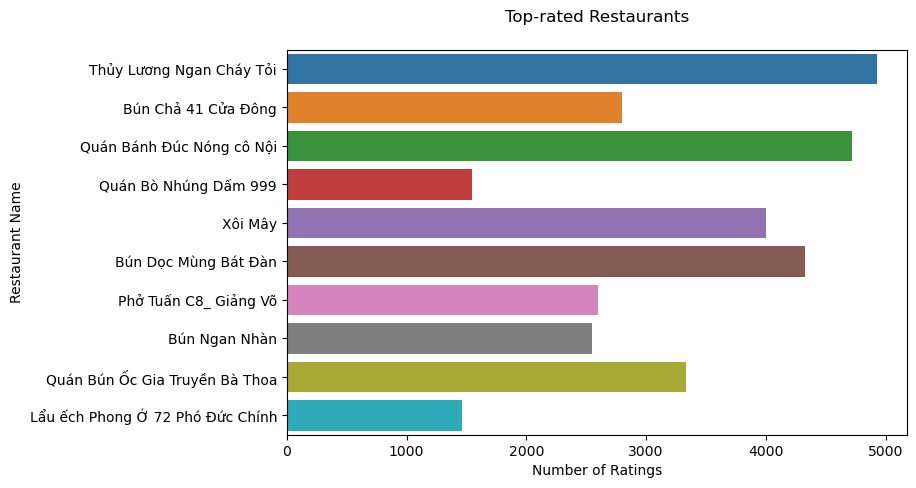

In [86]:
top_10 = res_new['res_id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10, preparation[['Res_Id','Res_Name']], how='left', left_on='index', right_on='Res_Id')

# Create a bar plot to visualize the top-rated restaurants
plt.figure(figsize=(8,5))
sns.barplot(x='index', y='Res_Name', data=top_10)
plt.title('Top-rated Restaurants', pad=20)
plt.ylabel('Restaurant Name')
plt.xlabel('Number of Ratings')
plt.show()

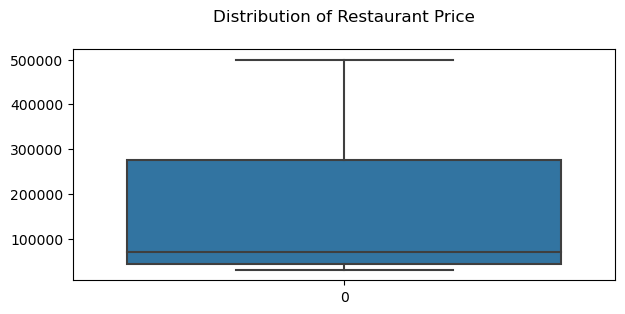

In [87]:
plt.figure(figsize=(7,3))
sns.boxplot(info_res['Res_Price'])
plt.title('Distribution of Restaurant Price', pad=20)
plt.show()

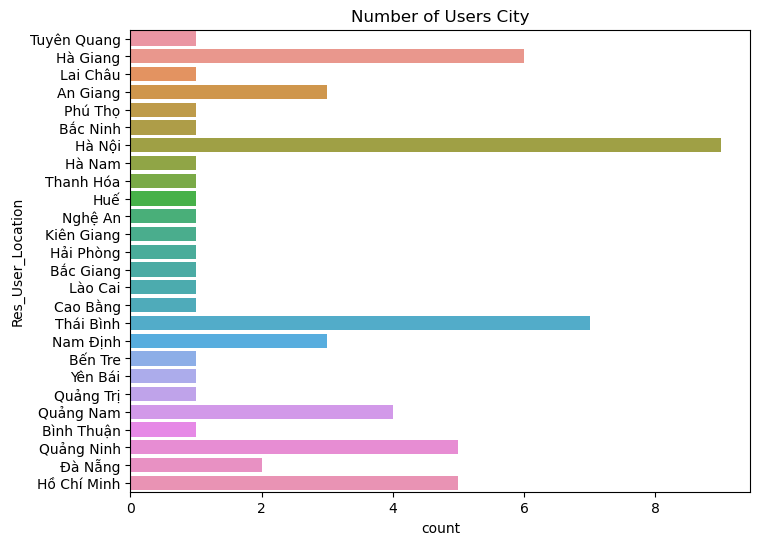

In [88]:
askot = userres['Res_User_Location'].apply(lambda x : x.split(',')[0])

# Visualization of the user's city
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Number of Users City')
plt.show()

# Content Based Filtering

In [89]:
data = res_new
data.sample(5)

,res_id,res_name,res_type,res_descriptions,res_city,res_city_star
4,3233,Bánh Tôm Cô Ầm,Ăn vặt/vỉa hè,Quán bánh tôm Cô Ầm nằm tại vị trí đầu ngõ Đồn...,Hà Nội,Hà Nội Ăn vặt/vỉa hè
2,1846,Bún Riêu Cua 41 Quang Trung,Quán ăn,Được biết đến như một trong những địa điểm bún...,Hà Nội,Hà Nội Quán ăn
9,1463,Lẩu ếch Phong Ớ 72 Phó Đức Chính,Quán ăn,"Nước lẩu được nấu khá kỹ, có vị chua nhẹ của d...",Hà Nội,Hà Nội Quán ăn
11,2552,Bún Ngan Nhàn,Quán ăn,Nhắc đến bún ngan có lẽ đa phần người dân Hà N...,Hà Nội,Hà Nội Quán ăn
10,3332,Quán Bún Ốc Gia Truyền Bà Thoa,Quán ăn,"Bún ốc Gia Truyền Bà Thoa ngon, rẻ, thịt ốc tư...",Hà Nội,Hà Nội Quán ăn


## TF-IDF Vectorizer

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv.fit(data['res_descriptions'])

print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['thủy', 'lương', 'ngan', 'cháy', 'tỏi', 'hàng', 'lược', 'có', 'thực', 'đơn', 'đa', 'dạng', 'từ', 'bún', 'chảo', 'luộc', 'xào', 'cho', 'đến', 'nướng', 'rất', 'thích', 'hợp', 'khách', 'ăn', 'trưa', 'tối', 'và', 'dân', 'nhậu', 'đặc', 'biệt', 'món', 'bán', 'chạy', 'nhất', 'quán', 'là', 'trộn', 'chua', 'ngọt', 'với', 'hương', 'vị', 'cay', 'mặn', 'đủ', 'cả', 'gắp', 'một', 'miếng', 'thôi', 'cũng', 'đã', 'khiến', 'mê', 'đắm', 'không', 'thể', 'buông', 'đũa', 'xuống', 'được', 'từng', 'đây', 'sạch', 'sẽ', 'đảm', 'bảo', 'vệ', 'sinh', 'an', 'toàn', 'phẩm', 'chặt', 'đẹp', 'mắt', 'ướp', 'gia', 'thơm', 'mọng', 'đĩa', 'đầy', 'đặn', 'chinh', 'phục', 'mọi', 'khó', 'tính', 'tuy', 'nằm', 'ẩn', 'nấp', 'trong', 'hẻm', 'nhưng', 'chả', 'nem', '41', 'cửa', 'đông', 'đang', 'thu', 'hút', 'đảo', 'mỗi', 'ngày', 'nhân', 'viên', 'vui', 'vẻ', 'nhiệt', 'tình', 'vụ', 'nhanh', 'dù', 'khá', 'gian', 'của', 'thoải', 'mái', 'biết', 'như', 'những', 'địa', 'điểm', 'riêu', 'quang', 'trung', 'hà', 'nội', 'ưa', '

In [91]:
cv_matrix = cv.transform(data['res_descriptions']) 
 
cv_matrix.shape 

(18, 559)

In [92]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [93]:
pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index = data.res_name
).sample(5)

,thủy,lương,ngan,cháy,tỏi,hàng,lược,có,thực,đơn,...,xưởng,xúc,xích,chung,rồi,bơ,tăng,trứng,đập,hỗn
res_name,,,,,,,,,,,,,,,,,,,,,
Phở Cuốn Hương Mai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bún Riêu Cua 41 Quang Trung,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Bún Ngan Nhàn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Phở Tuấn C8_ Giảng Võ,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
Xôi Mây,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Cosine Similarity

In [94]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(cv_matrix)
cosine_sim

array([[1.        , 0.17290277, 0.25081916, 0.15306275, 0.21620084,
        0.13210765, 0.21565864, 0.16158659, 0.16184366, 0.22076025,
        0.20009607, 0.31606542, 0.20556252, 0.31493768, 0.14858189,
        0.1442984 , 0.20890038, 0.20572423],
       [0.17290277, 1.        , 0.31870056, 0.165985  , 0.32619617,
        0.06367145, 0.50395263, 0.09837388, 0.24961029, 0.15073197,
        0.13887301, 0.2692396 , 0.24910095, 0.14808722, 0.08951436,
        0.08242606, 0.14985373, 0.11480779],
       [0.25081916, 0.31870056, 1.        , 0.21281413, 0.35847897,
        0.12595114, 0.3156817 , 0.12973163, 0.28802926, 0.26309042,
        0.30523385, 0.30834389, 0.3285046 , 0.28317288, 0.20068167,
        0.3057195 , 0.3087832 , 0.34410006],
       [0.15306275, 0.165985  , 0.21281413, 1.        , 0.15541239,
        0.19375595, 0.11850215, 0.15421444, 0.31764199, 0.16188924,
        0.13659756, 0.06272243, 0.1127646 , 0.10651445, 0.14858041,
        0.11971303, 0.21764288, 0.12126781],
    

In [95]:
cosine_sim_df = pd.DataFrame(cosine_sim,index=data['res_name'],columns=data['res_name'])
cosine_sim_df.sample(5,axis=1).sample(10,axis=0)

res_name,Quán Bún Ốc Gia Truyền Bà Thoa,Bánh Tôm Cô Ầm,Xôi Mây,Phở Cuốn Hương Mai,Quán Bánh Đúc Nóng cô Nội
res_name,,,,,
Vịt Cỏ Hạnh Béo,0.151635,0.404119,0.094733,0.080218,0.254877
Phở Cuốn Hương Mai,0.127721,0.132693,0.148187,1.000000,0.250462
Bún Dọc Mùng Bát Đàn,0.219363,0.209324,0.143164,0.075431,0.233010
Bánh Mỳ Dân Tổ,0.270560,0.232643,0.235435,0.073100,0.363638
Phở Tuấn C8_ Giảng Võ,0.136277,0.270853,0.072976,0.288375,0.292691
Bún Đậu Cô Tuyến Mắm Tôm Hàng Khay,0.254204,0.325688,0.080437,0.119198,0.224430
Phở Thìn Bờ Hồ,0.136615,0.053482,0.070447,0.375816,0.221125
Xôi Mây,0.182323,0.136263,1.000000,0.148187,0.231393
Quán Bò Nhúng Dấm 999,0.114468,0.212856,0.177080,0.124644,0.277917


## Recommendation

In [96]:
# Hàm gợi ý khách sạn dựa trên mô tả
def get_recommendations(res_index, cosine_sim=cosine_sim):
    sim_scores = list(enumerate(cosine_sim[res_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Lấy 10 khách sạn có độ tương đồng cao nhất
    res_indices = [i[0] for i in sim_scores]
    return data.iloc[res_indices]

# Gợi ý 10 khách sạn tương tự với khách sạn có index là 0
recommendations = get_recommendations(0)
print(recommendations[['res_name', 'res_descriptions']])

                            res_name  \
11                     Bún Ngan Nhàn   
13              Bún Dọc Mùng Bát Đàn   
2        Bún Riêu Cua 41 Quang Trung   
9   Lẩu ếch Phong Ớ 72 Phó Đức Chính   
4                     Bánh Tôm Cô Ầm   
6                    Vịt Cỏ Hạnh Béo   
16         Quán Bánh Đúc Nóng cô Nội   
17                    Bánh Mỳ Dân Tổ   
12             Phở Tuấn C8_ Giảng Võ   
10    Quán Bún Ốc Gia Truyền Bà Thoa   

                                     res_descriptions  
11  Nhắc đến bún ngan có lẽ đa phần người dân Hà N...  
13  Quán 18 Bát Đàn đã tổng hòa hương vị trong bát...  
2   Được biết đến như một trong những địa điểm bún...  
9   Nước lẩu được nấu khá kỹ, có vị chua nhẹ của d...  
4   Quán bánh tôm Cô Ầm nằm tại vị trí đầu ngõ Đồn...  
6   Quán Vịt cỏ Hạnh Béo nằm ngay tại vị trí khá đ...  
16  Quán nằm trong con ngõ sâu. Khách có thể ngồi ...  
17  Bánh mì dân tổ ban đầu thường được phục vụ cho...  
12  Phở Tuấn là một quán ăn bình dân, giá rẻ nằm t...  

## Evaluate

# Collaborative Filtering

In [97]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [98]:
df = res_rating
df

,Res_User_Id,Res_Id,Res_User_Rating,Res_User_Review_Date,Res_User_Review
0,796,4929,5,2 months ago,"Món ngan cháy tỏi được ướp thấm các gia vị, tỏ..."
1,796,2795,4,NaN,NaN
2,796,1846,5,NaN,NaN
3,812,4929,5,7 months ago,Hai vc tình cờ đi qua nên vào ăn thử. Không ng...
4,812,1474,4,NaN,NaN
...,...,...,...,...,...
107,989,3367,4,4 weeks ago,NaN
108,122,3367,5,a month ago,đồ ăn quá đỉnh ạ
109,270,3332,4,2 weeks ago,"Bún ngon , riêng quẩy rất ỉu nhưng vẫn mang bá..."
110,905,3332,4,2 weeks ago,Quán bún ốc khá ngon nhưng hơi ít toping. Bát ...


## Data Preparation

### Encode

In [99]:
user_ids = df.Res_User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [100]:
res_ids = df.Res_Id.unique().tolist()

res_to_res_encoded = {x: i for i, x in enumerate(res_ids)}

res_encoded_to_res = {x: i for x, i in enumerate(res_ids)}

In [101]:
df['res_user_id'] = df.Res_User_Id.map(user_to_user_encoded)

df['res_id'] = df.Res_Id.map(res_to_res_encoded)

In [102]:
num_users = len(user_to_user_encoded)

num_res = len(res_encoded_to_res)

df['Res_User_Rating'] = df['Res_User_Rating'].values.astype(np.float32)

min_rating = min(df['Res_User_Rating'])

max_rating= max(df['Res_User_Rating'])

print('Number of User: {}, Number of Res: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_res, min_rating, max_rating
))

Number of User: 59, Number of Res: 18, Min Rating: 1.0, Max Rating: 5.0


## Train Test Split

In [103]:
df = df.sample(frac=1,random_state=42)
df

,Res_User_Id,Res_Id,Res_User_Rating,Res_User_Review_Date,Res_User_Review,res_user_id,res_id
40,288,4328,4.0,NaN,NaN,16,13
65,929,1152,5.0,a month ago,I love their Phở Chiên Phồng!! The portion is ...,27,5
4,812,1474,4.0,NaN,NaN,1,3
47,640,1474,3.0,NaN,NaN,18,3
42,337,3233,5.0,1 year ago,Bánh tôm cô Ầm ngon đỉnh nhé các bạn. Nên đi s...,17,4
...,...,...,...,...,...,...,...
106,325,3367,5.0,3 weeks ago,quá nà keooo😘😘\r\ncác anh các chị siu cuti …,53,17
14,509,1474,2.0,2 weeks ago,Không gian cây xanh ok nhưng chả cá thì chiên ...,5,3
92,520,4722,5.0,3 months ago,Quán nằm sâu trong một con hẻm nhỏ. Bánh đúc n...,45,16
51,289,4001,5.0,6 months ago,Quán tủ của vợ chồng mình. Quán tuy đông nhưng...,21,14


In [104]:
x = df[['res_user_id','res_id']].values

y = df['Res_User_Rating'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

train_indices = int(0.8 * df.shape[0])

x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[16 13]
 [27  5]
 [ 1  3]
 [18  3]
 [17  4]
 [29  1]
 [10  1]
 [ 4  3]
 [ 3  6]
 [17  6]
 [32  9]
 [22 15]
 [29  6]
 [47 15]
 [ 0  0]
 [ 7  8]
 [21  5]
 [37 11]
 [35 12]
 [44 16]
 [14  7]
 [ 4  6]
 [12  0]
 [27  8]
 [43 12]
 [25  0]
 [ 8  0]
 [39  2]
 [37  5]
 [34  9]
 [ 5  7]
 [12  2]
 [18  4]
 [ 3  5]
 [13  5]
 [23 14]
 [26  5]
 [11  2]
 [36 11]
 [ 2  3]
 [54 17]
 [29  2]
 [16  4]
 [14 11]
 [ 6  8]
 [52 12]
 [14  2]
 [57 10]
 [ 2  4]
 [17  3]
 [28  6]
 [47 13]
 [10  9]
 [ 7  9]
 [43 16]
 [ 1  7]
 [ 9  4]
 [ 3  3]
 [39  7]
 [20 13]
 [ 4  7]
 [35  9]
 [ 9  1]
 [ 1  0]
 [ 6  9]
 [15 12]
 [49 15]
 [ 2  2]
 [31  6]
 [46 15]
 [42  7]
 [22 14]
 [20  5]
 [39  1]
 [18  4]
 [33  3]
 [25  5]
 [55 17]
 [56 10]
 [16 14]
 [23  9]
 [19 13]
 [ 1 16]
 [23 13]
 [33  9]
 [13  2]
 [51 12]
 [24 14]
 [25  3]
 [ 1 16]
 [15  4]
 [11  0]
 [47  4]
 [ 0  1]
 [21  9]
 [ 8  1]
 [ 0  2]
 [ 8  3]
 [41  7]
 [48 15]
 [32  3]
 [40  7]
 [38 11]
 [58 10]
 [ 7 10]
 [24 10]
 [30  6]
 [53 17]
 [ 5  3]
 [45 16]
 [21 14]
 

## Training

In [105]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) 
    self.place_embedding = layers.Embedding( 
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) 
    user_bias = self.user_bias(inputs[:, 0]) 
    place_vector = self.place_embedding(inputs[:, 1]) 
    place_bias = self.place_bias(inputs[:, 1]) 
 
    dot_user_place = tf.tensordot(user_vector, place_vector, 2) 
 
    x = dot_user_place + user_bias + place_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [106]:
model = RecommenderNet(num_users, num_res, 100)
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [107]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 1.0265 - root_mean_squared_error: 0.5070 - val_loss: 1.7086 - val_root_mean_squared_error: 0.7164
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9519 - root_mean_squared_error: 0.4300 - val_loss: 1.7101 - val_root_mean_squared_error: 0.7162
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7450 - root_mean_squared_error: 0.3718 - val_loss: 1.7012 - val_root_mean_squared_error: 0.7146
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7797 - root_mean_squared_error: 0.3673 - val_loss: 1.6905 - val_root_mean_squared_error: 0.7130
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8745 - root_mean_squared_error: 0.3795 - val_loss: 1.6743 - val_root_mean_squared_error: 0.7105
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9641 - root_mean_squared_error: 0.3745 - val_loss: 1.6518 - val_root_mean_squared_error: 0.7071
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step -

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5911 - root_mean_squared_error: 0.2688 - val_loss: 1.3729 - val_root_mean_squared_error: 0.6347
Epoch 44/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5553 - root_mean_squared_error: 0.2412 - val_loss: 1.3640 - val_root_mean_squared_error: 0.6330
Epoch 45/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5541 - root_mean_squared_error: 0.2474 - val_loss: 1.3669 - val_root_mean_squared_error: 0.6331
Epoch 46/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5813 - root_mean_squared_error: 0.2459 - val_loss: 1.3638 - val_root_mean_squared_error: 0.6325
Epoch 47/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5437 - root_mean_squared_error: 0.2247 - val_loss: 1.3642 - val_root_mean_squared_error: 0.6323
Epoch 48/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5708 - root_mean_squared_error: 0.2466 - val_loss: 1.3669 - val_root_mean_squared_error: 0.6325
Epoch 49/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss:

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5457 - root_mean_squared_error: 0.2109 - val_loss: 1.3912 - val_root_mean_squared_error: 0.6328
Epoch 86/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5607 - root_mean_squared_error: 0.2131 - val_loss: 1.3934 - val_root_mean_squared_error: 0.6331
Epoch 87/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5083 - root_mean_squared_error: 0.2181 - val_loss: 1.3889 - val_root_mean_squared_error: 0.6326
Epoch 88/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5430 - root_mean_squared_error: 0.2112 - val_loss: 1.3832 - val_root_mean_squared_error: 0.6318
Epoch 89/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5567 - root_mean_squared_error: 0.2263 - val_loss: 1.3872 - val_root_mean_squared_error: 0.6322
Epoch 90/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5361 - root_mean_squared_error: 0.2215 - val_loss: 1.3936 - val_root_mean_squared_error: 0.6330
Epoch 91/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss:

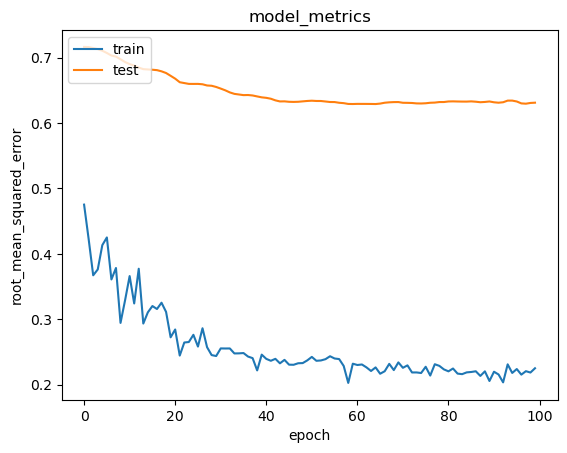

In [108]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Recommendation

In [109]:
res_df = res_new
df = pd.read_csv(f'{DATA_PATH}/res_rating.csv')

res_user_id = df.Res_User_Id.sample(1).iloc[0]
res_visited_by_user = df[df.Res_User_Id == res_user_id]

res_not_visited = res_df[~res_df['res_id'].isin(res_visited_by_user['Res_Id'].values)]['res_id'] 
res_not_visited = list(
    set(res_not_visited)
    .intersection(set(res_to_res_encoded.keys()))
)
 
res_not_visited = [[res_to_res_encoded.get(x)] for x in res_not_visited]
user_encoder = user_to_user_encoded.get(res_user_id)
user_res_array = np.hstack(
    ([[user_encoder]] * len(res_not_visited), res_not_visited)
)

In [110]:
ratings = model.predict(user_res_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_res_ids = [
    res_encoded_to_res.get(res_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(res_user_id))
print('===' * 9)
print('Hotel with high ratings from user')
print('----' * 8)
 
top_res_user = (
    res_visited_by_user.sort_values(
        by = 'Res_User_Rating',
        ascending=False
    )
    .head(5)
    .Res_Id.values
)
 
res_df_rows = res_df[res_df['res_id'].isin(top_res_user)]
pd.DataFrame(res_df_rows)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
Showing recommendations for users: 526
Hotel with high ratings from user
--------------------------------


,res_id,res_name,res_type,res_descriptions,res_city,res_city_star
1,2795,Bún Chả 41 Cửa Đông,Quán ăn,Tuy nằm ẩn nấp trong hẻm nhưng quán Bún Chả Ne...,Hà Nội,Hà Nội Quán ăn
2,1846,Bún Riêu Cua 41 Quang Trung,Quán ăn,Được biết đến như một trong những địa điểm bún...,Hà Nội,Hà Nội Quán ăn
6,1811,Vịt Cỏ Hạnh Béo,Quán ăn,Quán Vịt cỏ Hạnh Béo nằm ngay tại vị trí khá đ...,Hà Nội,Hà Nội Quán ăn


In [111]:
print('----' * 8)
print('Top 10 restaurant recommendation')
print('----' * 8)
 
recommended_res = res_df[res_df['res_id'].isin(recommended_res_ids)]
recommended_res

--------------------------------
Top 10 restaurant recommendation
--------------------------------


,res_id,res_name,res_type,res_descriptions,res_city,res_city_star
0,4929,Thủy Lương Ngan Cháy Tỏi,Quán ăn,Thủy Lương Ngan Cháy Tỏi - Hàng Lược có thực đ...,Hà Nội,Hà Nội Quán ăn
5,1152,Phở Cuốn Hương Mai,Quán ăn,Sinh ra từ làng Ngũ Xã – cái nôi của món phở c...,Hà Nội,Hà Nội Quán ăn
7,3305,Phở Thìn Bờ Hồ,Quán ăn,Phở Thìn là thương hiệu phở bò gia truyền lâu ...,Hà Nội,Hà Nội Quán ăn
8,2405,Bún Đậu Cô Tuyến Mắm Tôm Hàng Khay,Quán ăn,Mắm tôm của quán bún đậu cô Tuyến Hàng Khay rấ...,Hà Nội,Hà Nội Quán ăn
9,1463,Lẩu ếch Phong Ớ 72 Phó Đức Chính,Quán ăn,"Nước lẩu được nấu khá kỹ, có vị chua nhẹ của d...",Hà Nội,Hà Nội Quán ăn
12,2596,Phở Tuấn C8_ Giảng Võ,Quán ăn,"Phở Tuấn là một quán ăn bình dân, giá rẻ nằm t...",Hà Nội,Hà Nội Quán ăn
13,4328,Bún Dọc Mùng Bát Đàn,Quán ăn,Quán 18 Bát Đàn đã tổng hòa hương vị trong bát...,Hà Nội,Hà Nội Quán ăn
14,4001,Xôi Mây,Ăn vặt/vỉa hè,Xôi Mây gây ấn tượng với thực khách bởi hương ...,Hà Nội,Hà Nội Ăn vặt/vỉa hè
15,1544,Quán Bò Nhúng Dấm 999,Quán ăn,Một trong những địa chỉ lẩu bò nhúng dấm được ...,Hà Nội,Hà Nội Quán ăn
17,3367,Bánh Mỳ Dân Tổ,Ăn vặt/vỉa hè,Bánh mì dân tổ ban đầu thường được phục vụ cho...,Hà Nội,Hà Nội Ăn vặt/vỉa hè


## Evaluate